<a href="https://colab.research.google.com/github/Dazzlin-32/SER-Amharic/blob/main/SER_with_Amharic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset


Cloning the github repository

In [ ]:
!git clone https://github.com/Ethio2021/ASED_V1.git
ASED_dataset = '/content/ASED_V1'
print("Data is downloaded at", ASED_dataset)
!rm '/content/ASED_V1/README.md'
!rm '/content/ASED_V1/.gitattributes'
!rm -rf '/content/ASED_V1/.git'


Cloning into 'ASED_V1'...
remote: Enumerating objects: 2519, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2519 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2519/2519), 134.62 MiB | 25.51 MiB/s, done.
Resolving deltas: 100% (339/339), done.
Updating files: 100% (2476/2476), done.
Data is downloaded at /content/ASED_V1


# Importing necessary libraries



In [ ]:
import pandas as pd #library for data manipulation and analysis
import numpy as np #library for arrays annd high level mathematical calculations

import os  #library for operating system
import sys #library for system specific parameteres

import librosa # librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa.display #for audio data visualisation
import seaborn as sns #library for attractive data visualisationd based on matplotlib
import matplotlib.pyplot as plt #library for data visualisation

from sklearn.preprocessing import StandardScaler, OneHotEncoder  #scikit learn  library for machine learning,
                                                                    #Preprocessing for transformer classes that convert raw data to vectors, StandardScaler for gaussian like distribution, OneHotEncoder for oneHotEncoding
from sklearn.metrics import confusion_matrix, classification_report #module for model reports and summary
from sklearn.model_selection import train_test_split #module for selcting model and class for allocating random test and train datasets

# to play the audio files
from IPython.display import Audio #for displaying Audio on the notebook

import keras #library for building neural networks
from keras.callbacks import ReduceLROnPlateau #Callbacks are objects that can perform various actions at various stages of training, Reduce Learning Rate after some epochs if no improvement is made
from keras.models import Sequential #models module for creating keras models, Sequential class for creating list of layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization #Layers module for building neural network using tensor-in-tensor-out, classes of layer types
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint # Callback function to save weight at some point in the training

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data Preparing

Here is the filename identifier per ASED Documentation



*   Emotion and Number of folders - n (neutral) f (fearful) h (happy) s (sad) a (angry)
*   Number of sentences -  (01,02...07)
*   Sentence repetition - (01 - first reptetion, 02 - second repetition ...)
*   Gender - (01 = female, 02 = male )
*   Number of Speaker - (01 --> 1st speaker, 02 --> 2nd speaker...65 )

Example :  'a5-03-01-02-50.wav' is the 3rd sentence spoken by the 50th male speaker with angry the first time in folder 5.








In [ ]:
ASED_list = os.listdir(ASED_dataset)

fileEmotion = []
filePath = []

for dir in ASED_list:
   # we have 5 emotions
    emotion = os.listdir(ASED_dataset + '/' + dir)
    for file in emotion:
      part = file.split("-")[0]
      fileEmotion.append(part[0])
      filePath.append(ASED_dataset +'/' + dir +'/' + file)


path_df = pd.DataFrame(filePath, columns = ['Path'])
emotion_df = pd.DataFrame(fileEmotion, columns = ['Emotion'])


ASED_df = pd.concat([emotion_df, path_df], axis = 1)
ASED_df.Emotion.replace({"n": "neutral", "f": "fearful", "h": "happy", "a": "angry", 's': "sad", "S" : "sad"}, inplace = True)
ASED_df.head()





/tmp/ipython-input-4-2739572303.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ASED_df.Emotion.replace({"n": "neutral", "f": "fearful", "h": "happy", "a": "angry", 's': "sad", "S" : "sad"}, inplace = True)


,Emotion,Path
0,fearful,/content/ASED_V1/02Fearful/f2-02-02-02-50.wav
1,fearful,/content/ASED_V1/02Fearful/f2-05-02-02-54.wav
2,fearful,/content/ASED_V1/02Fearful/f2-03-01-01-23.wav
3,fearful,/content/ASED_V1/02Fearful/f2-02-02-01-19.wav
4,fearful,/content/ASED_V1/02Fearful/f2-05-02-02-41.wav


Create Dataframe incase more data is concatnated

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ASED_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotion,Path
0,fearful,/content/ASED_V1/02Fearful/f2-02-02-02-50.wav
1,fearful,/content/ASED_V1/02Fearful/f2-05-02-02-54.wav
2,fearful,/content/ASED_V1/02Fearful/f2-03-01-01-23.wav
3,fearful,/content/ASED_V1/02Fearful/f2-02-02-01-19.wav
4,fearful,/content/ASED_V1/02Fearful/f2-05-02-02-41.wav


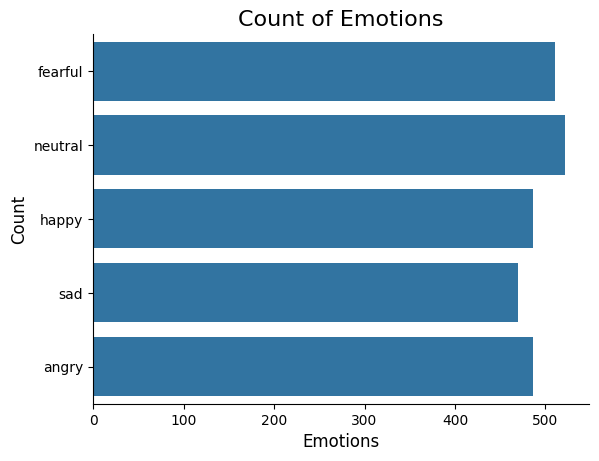

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

We can also plot waveplots and spectograms for audio signals

* Waveplots - Waveplots let us know the loudness of the audio at a given time.
* Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

[-2.5515328e-07 -1.7146656e-04 -3.3533544e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] 22050


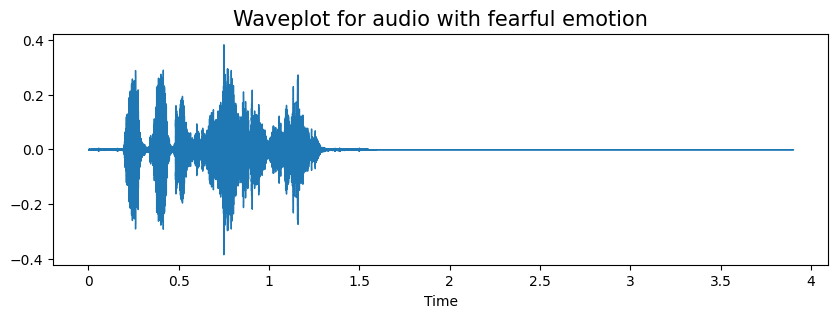

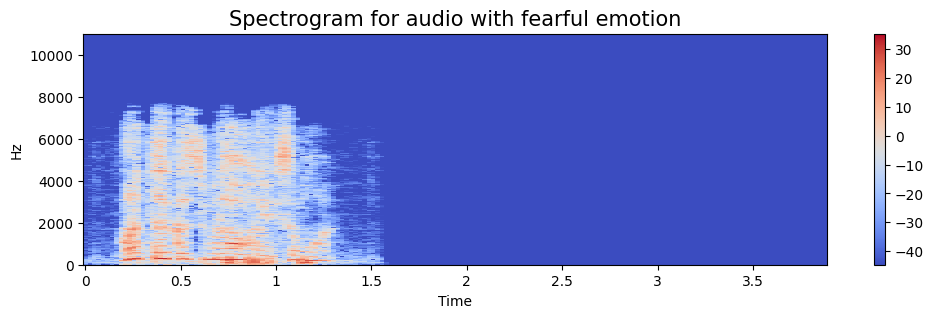

In [ ]:
emotion='fearful'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
print(data, sampling_rate)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
plt.show()

[0.0005402  0.00062768 0.00063915 ... 0.         0.         0.        ] 22050


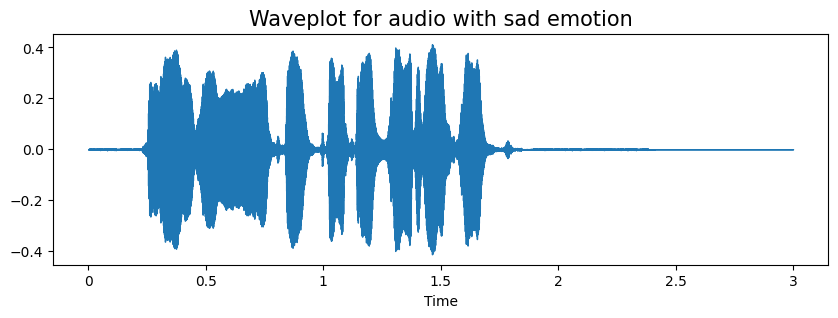

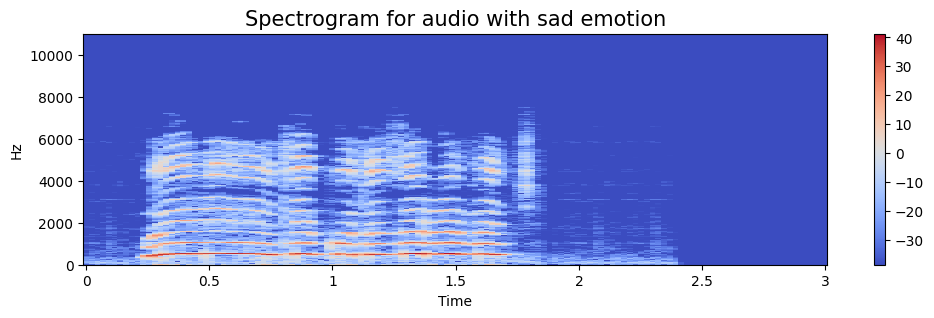

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
print(data, sampling_rate)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
plt.show()

[1.5974772e-10 4.5726217e-10 7.7101298e-11 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] 22050


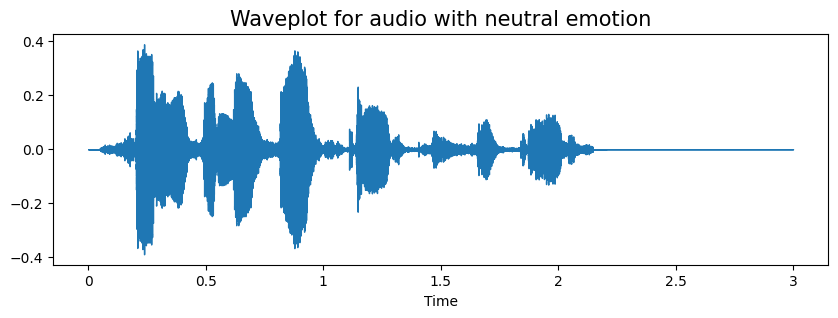

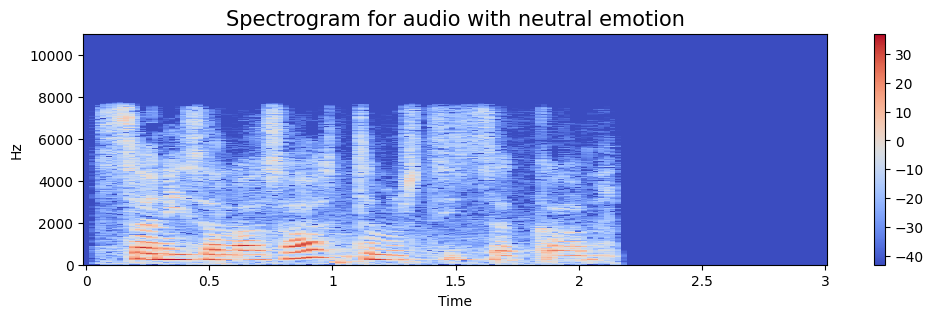

In [ ]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
print(data, sampling_rate)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
plt.show()

[0.0013452  0.0011452  0.00107751 ... 0.         0.         0.        ] 22050


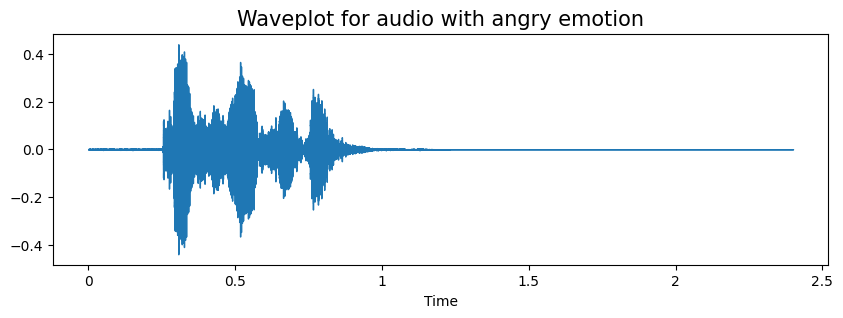

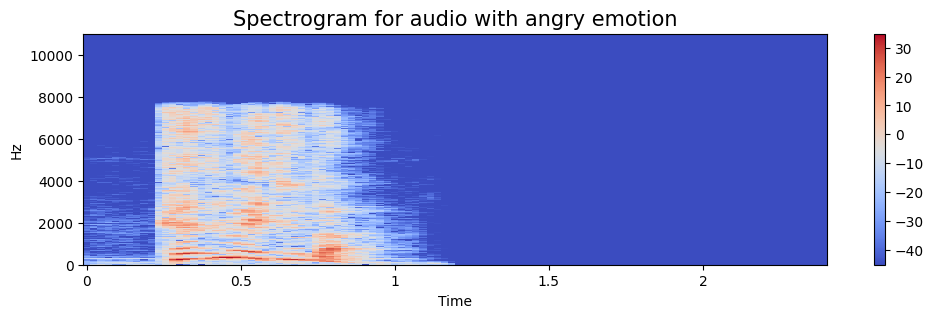

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
print(data, sampling_rate)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
plt.show()

[4.1770976e-04 2.2892686e-04 9.0978559e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] 22050


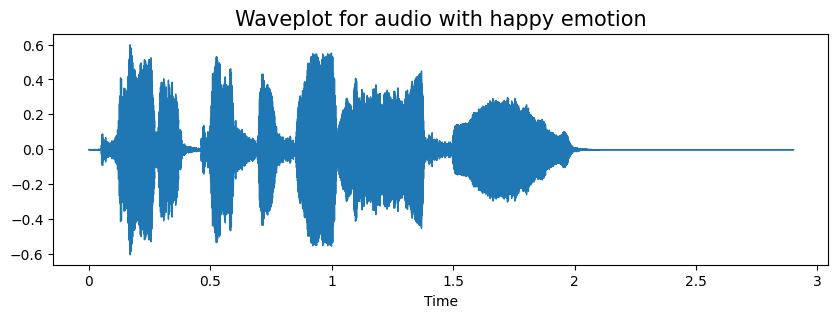

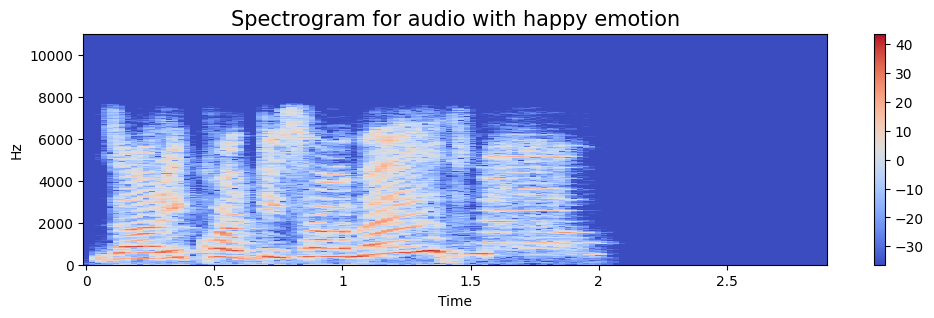

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
print(data, sampling_rate)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
plt.show()

Data Augmentation
Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
In order to this to work adding the perturbations must conserve the same label as the original training sample.
In images data augmention can be performed by shifting the image, zooming, rotating ...
First, let's check which augmentation techniques works better for our dataset.

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=0.7)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

# 1. Sample Audio

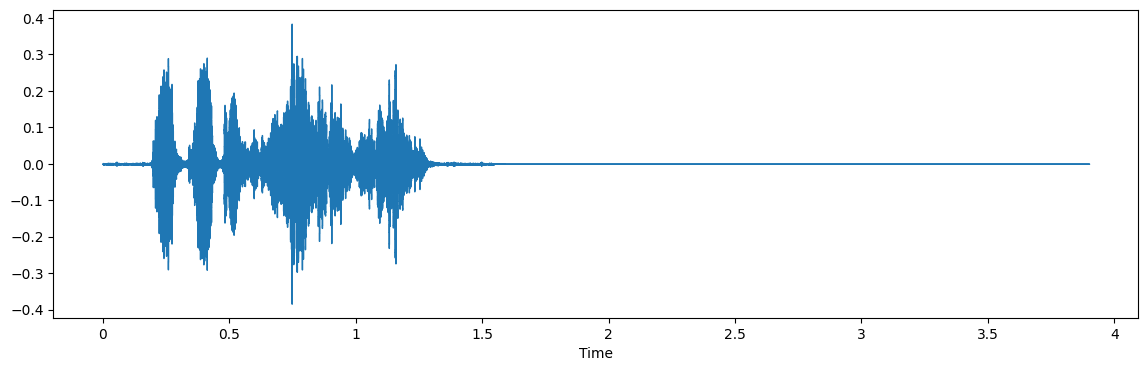

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

# 2. Noise Injection

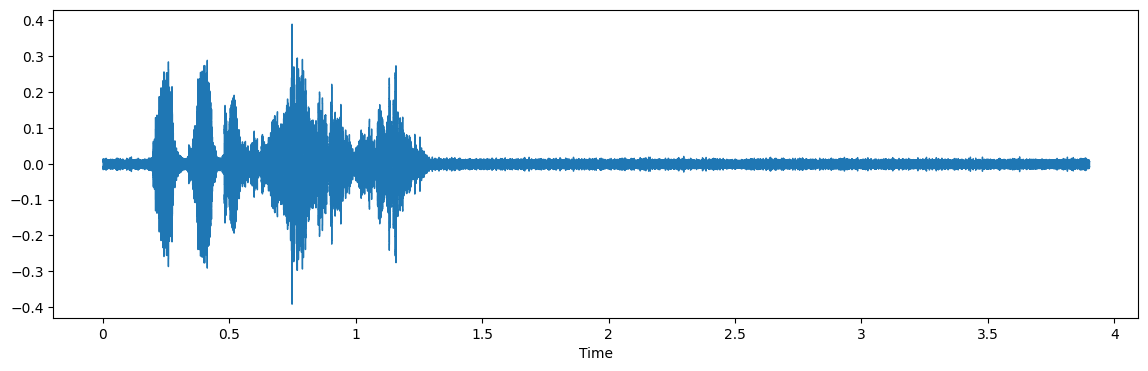

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# 3. Stretching

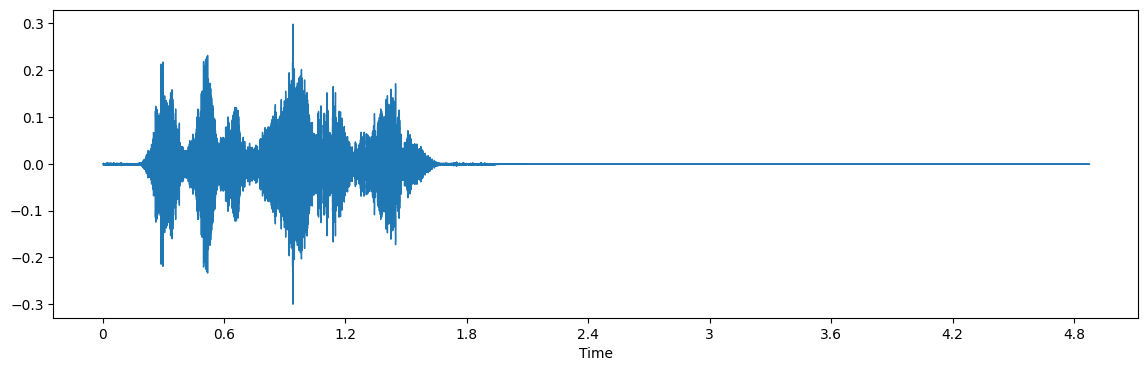

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# 4. Shifting

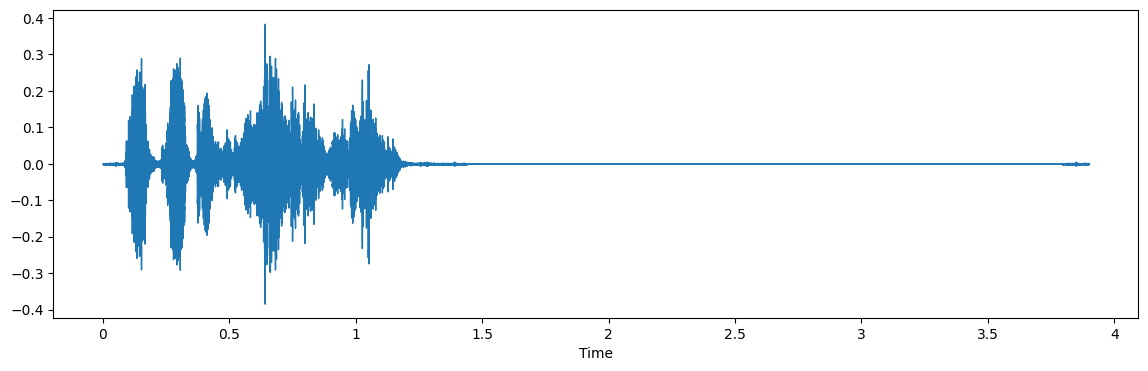

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# 5. Pitch

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Feature Extraction


- Zero Crossing Rate
    *   Why it matters: Tracks noisiness / energy bursts.
    *   Emotion impact: High for anger/excitement, low for sadness.
- Chroma_stft
    *   Why it matters: Captures pitch class energy (musical tone).
    *   Emotion impact: Useful in tonal languages or singing voice data.
- MFCC
    *  Why it matters: Captures timbre and vocal tract shape.
    *  Emotion impact: Foundational for SER, especially with deltas.
- RMS(root mean square) value
    *   Why it matters: Loudness and energy correlate with emotional arousal.
- MelSpectogram to train our model.
    *   Why it matters: Richer frequency representation than MFCC.
    *   Emotion impact: Very useful if used with CNNs.



In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally because we want all the features of the same data stacked as a array

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    #here we are creating 3 versions of the same audio by making 1 original , 1 eith noise and 1 with streching and picthing together
    #then we are stacking them in vertical row so we can  have a 3 row arrow with every feature added from the extract_features function

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
print("Path" , data_path.Path[0])

for path, emotion in zip(data_path.Path, data_path.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

Path /content/ASED_V1/02Fearful/f2-02-02-02-50.wav


In [ ]:
len(X), len(Y), data_path.Path.shape #checking the length of X and Y , they should be the same and 3 * datapath length

(7422, 7422, (2474,))

# DATA PREPARATION
Normalise data and split for train and test

In [ ]:
#creating a dataframe from X and storing it as csv for better inspection
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.089166,0.410494,0.372834,0.418374,0.406123,0.412092,0.478660,0.485419,0.530639,0.584102,...,6.877861e-07,5.879577e-07,5.194909e-07,4.701466e-07,4.340837e-07,4.079867e-07,3.891603e-07,3.766075e-07,3.690773e-07,fearful
1,0.289524,0.668084,0.655759,0.664151,0.654898,0.690219,0.653308,0.632337,0.674860,0.725123,...,2.240725e-02,2.208913e-02,2.367461e-02,2.321535e-02,2.232768e-02,2.261051e-02,2.242161e-02,2.337168e-02,2.379706e-02,fearful
2,0.102879,0.463648,0.418410,0.441024,0.442163,0.444855,0.518107,0.520188,0.560273,0.624568,...,7.841746e-07,6.180840e-07,5.151442e-07,4.458910e-07,3.976606e-07,3.645094e-07,3.429215e-07,2.699662e-07,1.137695e-07,fearful
3,0.040781,0.255801,0.241057,0.244544,0.261455,0.266585,0.263958,0.287559,0.274642,0.268420,...,1.420199e-07,1.351951e-07,1.301890e-07,1.263366e-07,1.234121e-07,1.213212e-07,1.197890e-07,1.188248e-07,1.182089e-07,fearful
4,0.386488,0.814079,0.808513,0.831389,0.855871,0.849712,0.735317,0.735651,0.751852,0.775001,...,1.164697e-03,1.141788e-03,1.177038e-03,1.265184e-03,1.211784e-03,1.199201e-03,1.197343e-03,1.182225e-03,1.219280e-03,fearful


In [ ]:
#creating arrays from X feature and Y feature
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5566, 162), (5566, 5), (1856, 162), (1856, 5))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5566, 162), (5566, 5), (1856, 162), (1856, 5))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5566, 162, 1), (5566, 5), (1856, 162, 1), (1856, 5))

# **BUILDING THE MODEL**

*Things to note


*   Conv1D - Kernel or filter matrix with 1 dimension
*   MaxPooling  - Keeps most salient features by reducing feature length
*   Dropout(0.2) → regularization; randomly drops 20% of neurons.
*   Flatten - Converts 3D output from Conv1D to 1D vector.
*   Dense - Learns global, high-level features after CNNs.




In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,189 (2.13 MB)

 Trainable params: 557,189 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 418ms/step - accuracy: 0.3132 - loss: 1.5409 - val_accuracy: 0.4914 - val_loss: 1.1911 - learning_rate: 0.0010
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 38s 436ms/step - accuracy: 0.5199 - loss: 1.1866 - val_accuracy: 0.5663 - val_loss: 1.0408 - learning_rate: 0.0010
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 423ms/step - accuracy: 0.5827 - loss: 1.0666 - val_accuracy: 0.6061 - val_loss: 0.9763 - learning_rate: 0.0010
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 43s 447ms/step - accuracy: 0.6222 - loss: 0.9648 - val_accuracy: 0.6369 - val_loss: 0.9359 - learning_rate: 0.0010
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 38s 413ms/step - accuracy: 0.6384 - loss: 0.9211 - val_accuracy: 0.6886 - val_loss: 0.8262 - learning_rate: 0.0010
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 402ms/step - accuracy: 0.6802 - loss: 0.8420 - val_accuracy: 0.7047 - val_loss: 0.7629 - learning_rate: 0.0010
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 36s 410ms/step - accuracy: 0.6801 - loss: 0.

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8825 - loss: 0.5050
Accuracy of our model on test data :  89.11637663841248 %


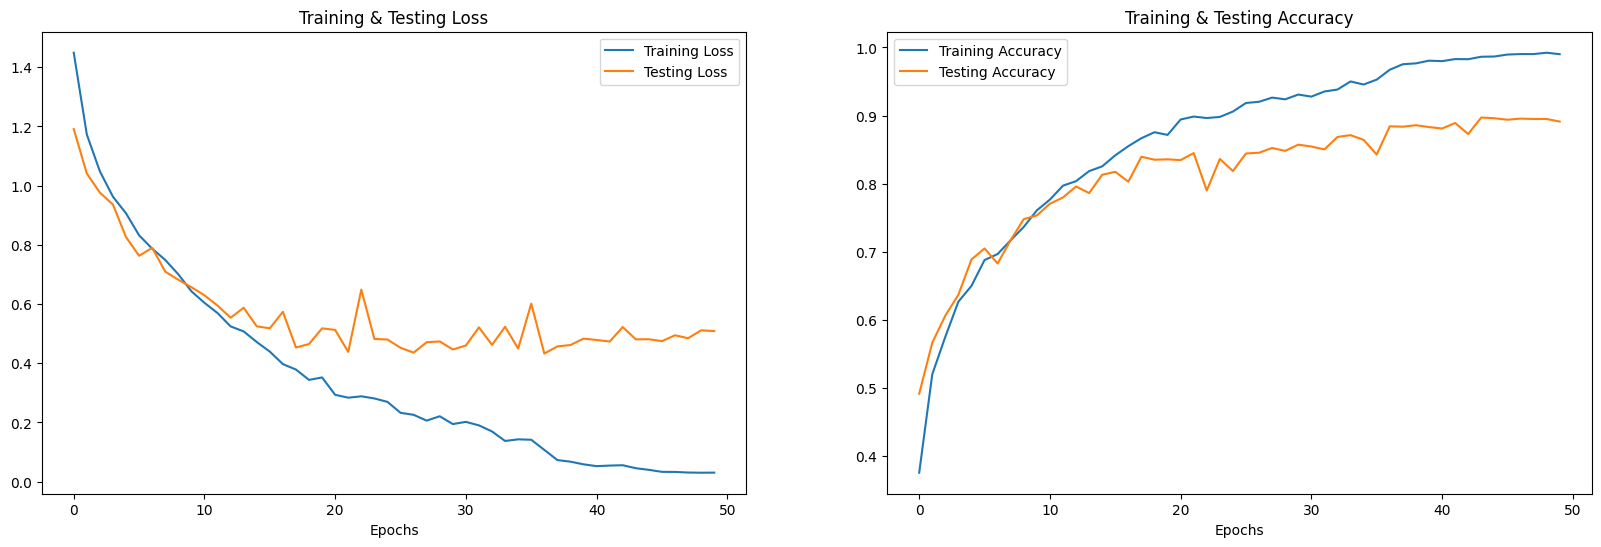

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
 # predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_dataFrame = encoder.inverse_transform(y_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_dataFrame.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,fearful,fearful
2,sad,sad
3,happy,happy
4,happy,neutral
5,neutral,neutral
6,sad,sad
7,sad,sad
8,angry,neutral
9,fearful,fearful


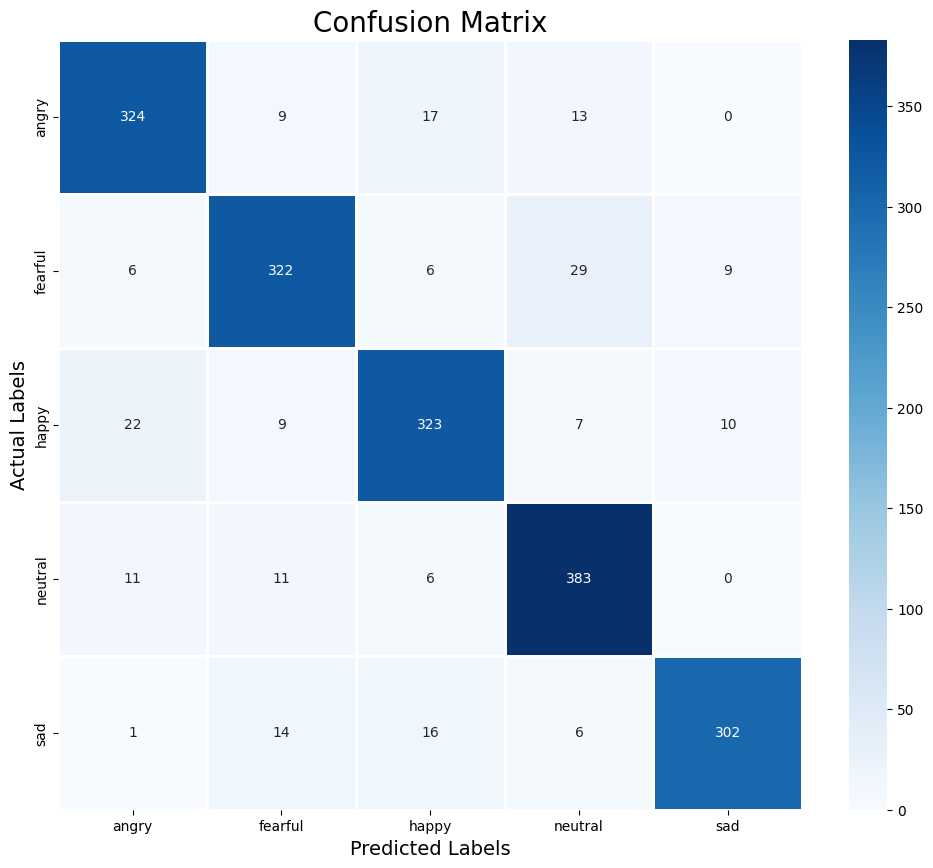

In [ ]:
cm = confusion_matrix(y_test_dataFrame, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test_dataFrame, y_pred))

              precision    recall  f1-score   support

       angry       0.89      0.89      0.89       363
     fearful       0.88      0.87      0.87       372
       happy       0.88      0.87      0.87       371
     neutral       0.87      0.93      0.90       411
         sad       0.94      0.89      0.92       339

    accuracy                           0.89      1856
   macro avg       0.89      0.89      0.89      1856
weighted avg       0.89      0.89      0.89      1856

